In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train test function
from sklearn.metrics import accuracy_score #importing scikit_learn metrics module for accuracy calculation

In [22]:
col_name = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
                'SkinThickness', 'DiabetesPedigreeFunction']

In [23]:
data = pd.read_csv('diabetes.csv')

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
x = data.drop('Outcome', axis=1)
y = data.Outcome

In [26]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=1)

In [27]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
y_predict = model.predict(test_x)

In [29]:
accuracy_score(y_predict, test_y)

0.696969696969697

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

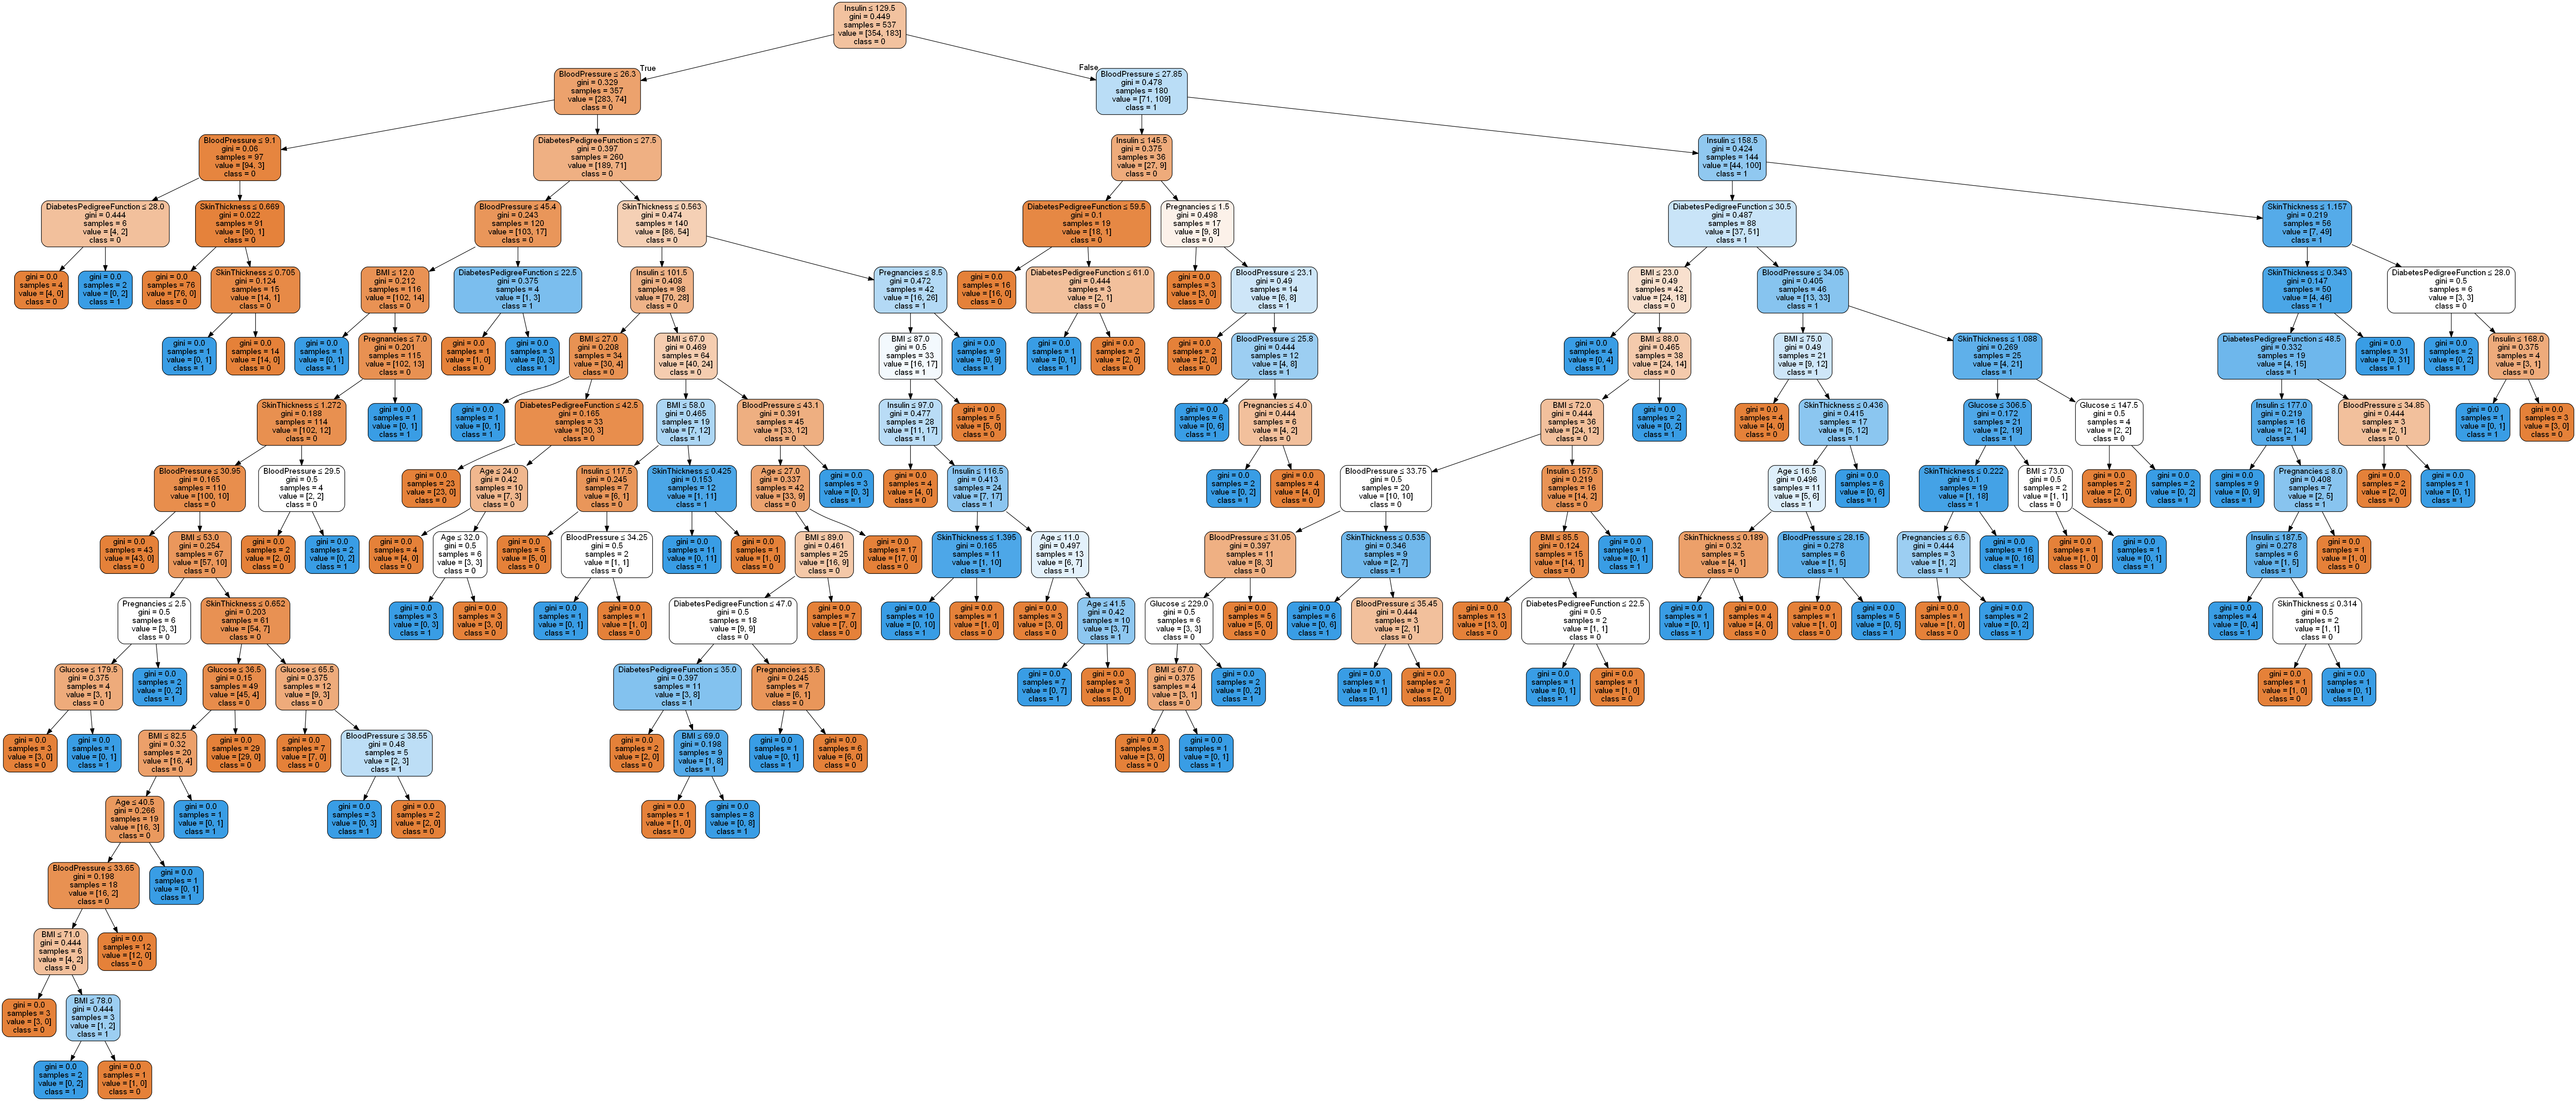

In [31]:
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=['0','1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [32]:
pwd()

'C:\\Users\\RAHUL\\Desktop\\gitonde\\rkk'

In [33]:
#create decision tree classifier object
clfr = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train decision tree classifier
clfr = clfr.fit(train_x, train_y)

#predict response for test data
y_pred = clfr.predict(test_x)

#model accuracy
print("Model Accuracy", accuracy_score(test_y, y_pred))

Model Accuracy 0.7705627705627706


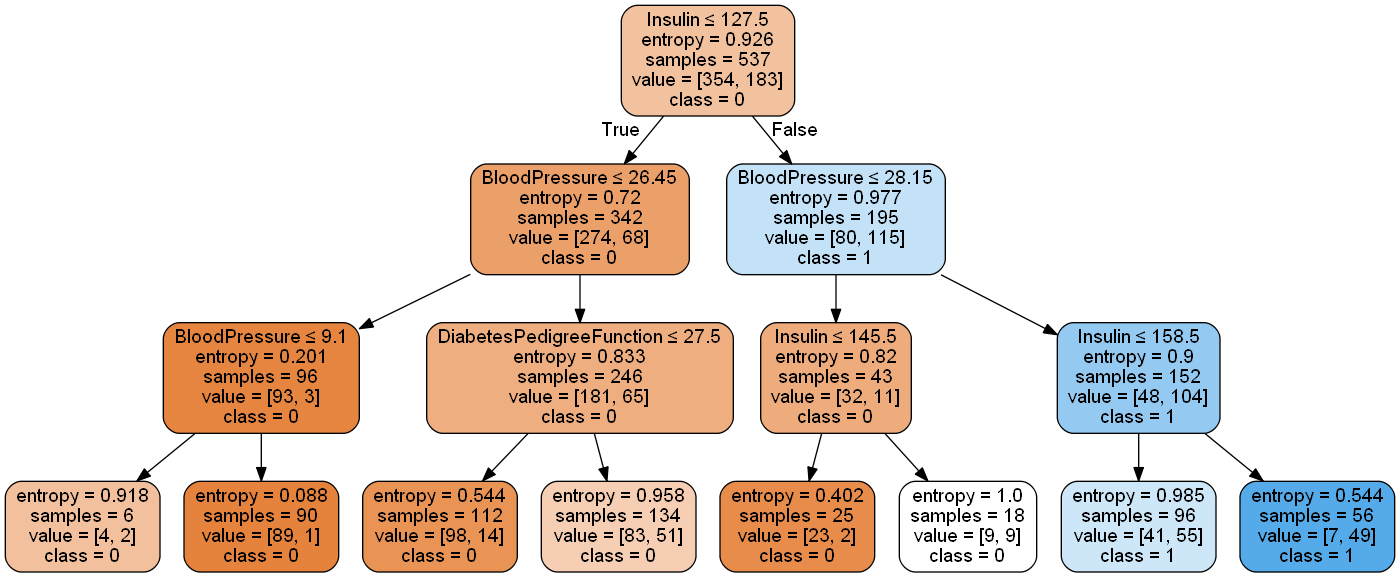

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clfr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [35]:
from sklearn.ensemble import RandomForestClassifier
clfr_random_forest = RandomForestClassifier(n_estimators=170)
clfr_random_forest.fit(train_x, train_y)
y_predict = clfr_random_forest.predict(test_x)

print("Accuracy:",accuracy_score(test_y, y_pred))

Accuracy: 0.7705627705627706


In [36]:
from sklearn.svm import SVC
clfr_svm = SVC()
clfr_svm.fit(train_x, train_y)
y_pred = clfr_svm.predict(test_x)

accuracy_score(test_y, y_pred) 

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6320346320346321

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
#spliting dataset into training data (70%) and testing data (test_size = 0.3 which means 30%)
train_x, test_x, train_y, test_y = train_test_split(x_std, y, test_size=0.3, random_state=1)
from sklearn.svm import SVC
clfr_svm = SVC()
clfr_svm.fit(train_x, train_y)
y_pred = clfr_svm.predict(test_x)

print("Models Accuracy : ",accuracy_score(test_y, y_pred))

Models Accuracy :  0.7965367965367965


C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
from sklearn.linear_model import LogisticRegression
clfr_logistic = LogisticRegression()
clfr_logistic = clfr_logistic.fit(train_x, train_y)
y_pred = clfr_logistic.predict(test_x)

print("Models Accuracy : ",accuracy_score(test_y, y_pred))

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Models Accuracy :  0.7835497835497836
